In [1]:
import pandas as pd
import Analyzer
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc

C:\Users\minuk\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [26]:
mk = Analyzer.MarketDB()
df = mk.get_daily_price('지누스','2017-01-01')

end_date is initialized to 2020-07-20


In [27]:
ema60 = df['close'].ewm(span=60).mean()
ema130 = df['close'].ewm(span=130).mean()
macd = ema60 - ema130
signal = macd.ewm(span=45).mean()
macdhist = macd - signal

In [28]:
df = df.assign(ema130=ema130,ema60=ema60, macd = macd, signal = signal, macdhist = macdhist)

In [29]:
df = df.dropna()

In [30]:
df['number'] = df.index.map(mdates.date2num)
ohlc = df[['number','open','high','low','close']]

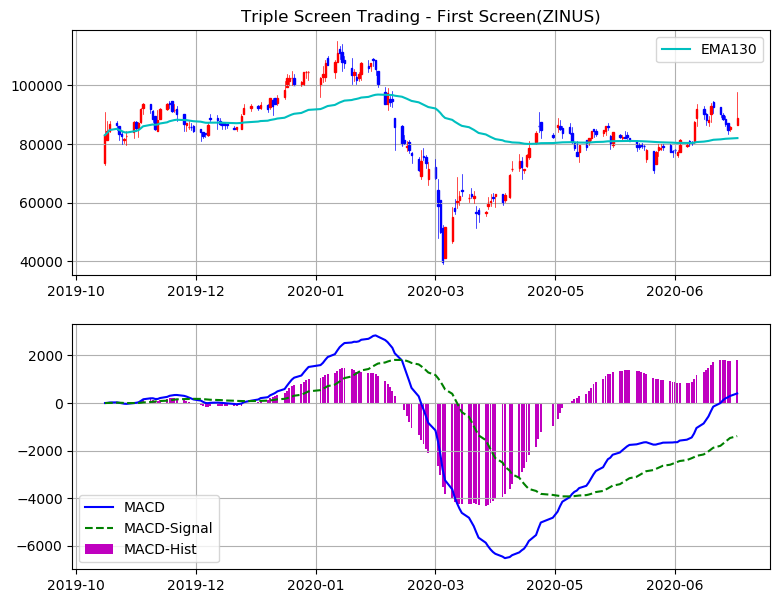

In [32]:
plt.figure(figsize=(9,7))
p1 = plt.subplot(2,1,1)
plt.title('Triple Screen Trading - First Screen(ZINUS)')
plt.grid(True)
candlestick_ohlc(p1,ohlc.values,width=.6,colorup='red',colordown='blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number,df['ema130'],color='c',label='EMA130')
plt.legend(loc='best')

p2=plt.subplot(2,1,2)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(df.number,df['macdhist'],color='m',label='MACD-Hist')
plt.plot(df.number,df['macd'],color='b',label='MACD')
plt.plot(df.number,df['signal'],'g--',label='MACD-Signal')
plt.legend(loc='best')
plt.show()

# 두번째 창 - 시장파도
- 시장이 하락할때 매수 기회를 제공, 시장이 상승할 때 매도 기회를 제공
- 130일 지수 이동평균과 스토캐스틱을 이용
- 스토캐스틱: n일동안의 거래 범위에서 현재 가격의 위치를 백분율로.
- %K(빠른선)와 %D(느린선)로 구성.
- %K = (C(today) - L(n)) / (H(n) - L(n)) * 100
- %D -> 3일동안 %K의 평균

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import Analyzer

In [34]:
mk = Analyzer.MarketDB()
df = mk.get_daily_price('지누스','2017-01-01')

#ema60 = df['close'].ewm(span=60).mean()
ema130 = df['close'].ewm(span=130).mean()
df = df.assign(ema130=ema130).dropna()

end_date is initialized to 2020-07-20


In [36]:
df['number'] = df.index.map(mdates.date2num)
ohlc = df[['number','open','high','low','close']]

In [38]:
ndays_high = df['high'].rolling(window=14,min_periods=1).max()
ndays_low = df['low'].rolling(window=14,min_periods=1).min()

In [41]:
fast_k = (df['close']-ndays_low)/(ndays_high-ndays_low)*100
slow_d = fask_k.rolling(window=3).mean()
df = df.assign(fast_k=fast_k, slow_d=slow_d)

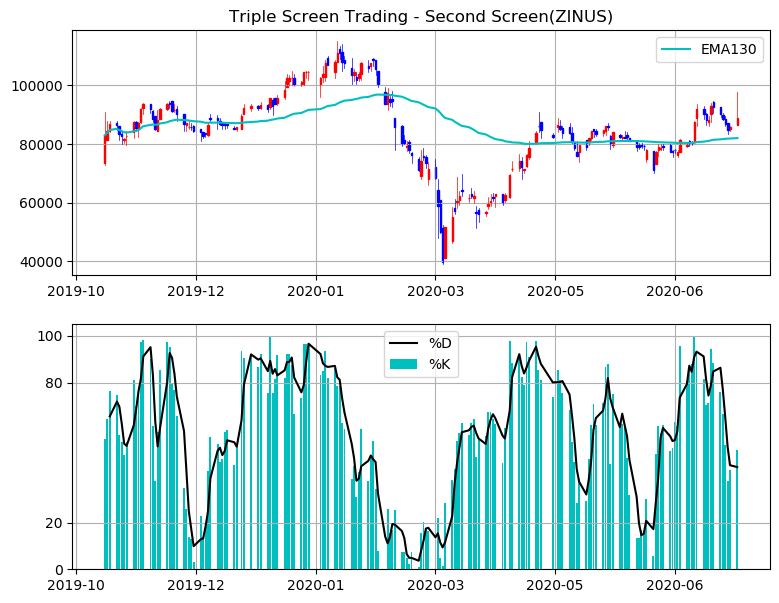

In [42]:
plt.figure(figsize=(9,7))
p1 = plt.subplot(2,1,1)
plt.title('Triple Screen Trading - Second Screen(ZINUS)')
plt.grid(True)
candlestick_ohlc(p1,ohlc.values,width=.6,colorup='red',colordown='blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number,df['ema130'],color='c',label='EMA130')
plt.legend(loc='best')

p2=plt.subplot(2,1,2)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(df.number,df['fast_k'],color='c',label='%K')
plt.plot(df.number,df['slow_d'],color='k',label='%D')
plt.yticks([0,20,80,100])
plt.legend(loc='best')
plt.show()

# 세번째 창 - 진입기술

end_date is initialized to 2020-07-21
sell stock:2019-05-07 price:124000
sell stock:2019-06-26 price:115500
buy stock:2020-01-29 price:180000
buy stock:2020-03-02 price:175000
sell stock:2020-04-01 price:163000
buy stock:2020-07-20 price:263000


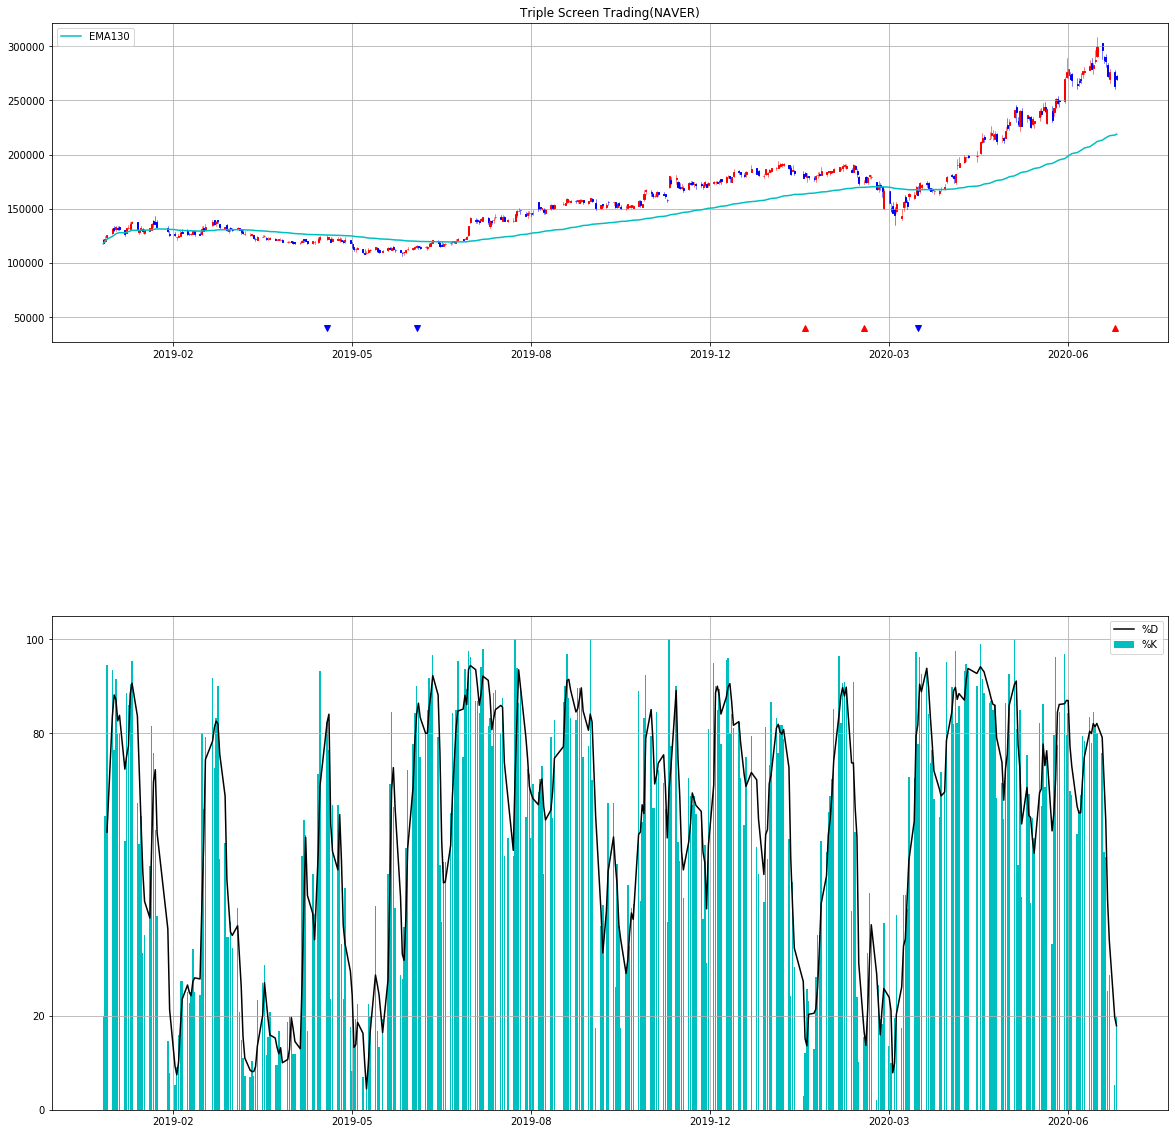

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import Analyzer
mk = Analyzer.MarketDB()
df = mk.get_daily_price('NAVER','2019-01-01')

#ema60 = df['close'].ewm(span=60).mean()
ema130 = df['close'].ewm(span=130).mean()
df = df.assign(ema130=ema130).dropna()
df['number'] = df.index.map(mdates.date2num)
ohlc = df[['number','open','high','low','close']]
ndays_high = df['high'].rolling(window=14,min_periods=1).max()
ndays_low = df['low'].rolling(window=14,min_periods=1).min()
fast_k = (df['close']-ndays_low)/(ndays_high-ndays_low)*100
slow_d = fast_k.rolling(window=3).mean()
df = df.assign(fast_k=fast_k, slow_d=slow_d)

plt.figure(figsize=(20,20))
p1 = plt.subplot(3,1,1)
plt.title('Triple Screen Trading(NAVER)')
plt.grid(True)
candlestick_ohlc(p1,ohlc.values,width=.6,colorup='red',colordown='blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number,df['ema130'],color='c',label='EMA130')
for i in range(1,len(df['close'])):
    if df['ema130'].values[i-1] < df['ema130'].values[i] and \
        df['slow_d'].values[i-1]>=20 and df['slow_d'].values[i]<20:
        plt.plot(df.number.values[i],40000,'r^')
        print("buy stock:{} price:{}".format(df['date'].values[i],df['close'].values[i]))
    elif df['ema130'].values[i-1] > df['ema130'].values[i] and \
        df['slow_d'].values[i-1] <= 80 and df['slow_d'].values[i]>80:
        plt.plot(df.number.values[i],40000,'bv')
        print("sell stock:{} price:{}".format(df['date'].values[i],df['close'].values[i]))
plt.legend(loc='best')

p2=plt.subplot(2,1,2)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(df.number,df['fast_k'],color='c',label='%K')
plt.plot(df.number,df['slow_d'],color='k',label='%D')
plt.yticks([0,20,80,100])
plt.legend(loc='best')
plt.show()

end_date is initialized to 2020-07-20
buy stock:2019-03-21 price:102500
buy stock:2019-05-27 price:122000
buy stock:2019-06-04 price:119500
buy stock:2019-07-30 price:126000
buy stock:2019-08-05 price:122500
buy stock:2019-08-07 price:123500
buy stock:2020-02-03 price:159500
buy stock:2020-03-11 price:169000


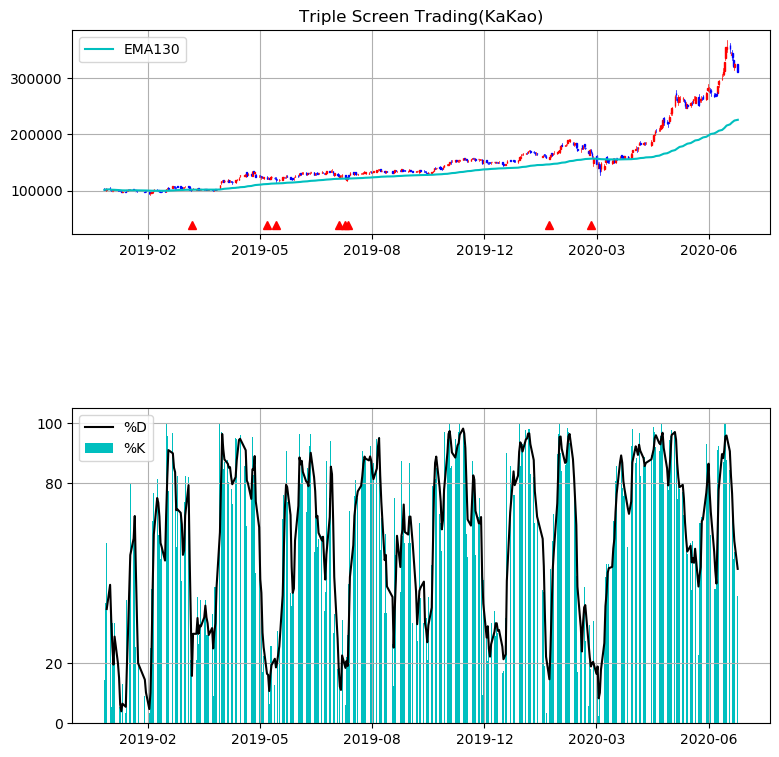

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import Analyzer
mk = Analyzer.MarketDB()
df = mk.get_daily_price('카카오','2019-01-01')

#ema60 = df['close'].ewm(span=60).mean()
ema130 = df['close'].ewm(span=130).mean()
df = df.assign(ema130=ema130).dropna()
df['number'] = df.index.map(mdates.date2num)
ohlc = df[['number','open','high','low','close']]
ndays_high = df['high'].rolling(window=14,min_periods=1).max()
ndays_low = df['low'].rolling(window=14,min_periods=1).min()
fast_k = (df['close']-ndays_low)/(ndays_high-ndays_low)*100
slow_d = fast_k.rolling(window=3).mean()
df = df.assign(fast_k=fast_k, slow_d=slow_d)

plt.figure(figsize=(9,9))
p1 = plt.subplot(3,1,1)
plt.title('Triple Screen Trading(KaKao)')
plt.grid(True)
candlestick_ohlc(p1,ohlc.values,width=.6,colorup='red',colordown='blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number,df['ema130'],color='c',label='EMA130')
for i in range(1,len(df['close'])):
    if df['ema130'].values[i-1] < df['ema130'].values[i] and \
        df['slow_d'].values[i-1]>=20 and df['slow_d'].values[i]<20:
        plt.plot(df.number.values[i],40000,'r^')
        print("buy stock:{} price:{}".format(df['date'].values[i],df['close'].values[i]))
    elif df['ema130'].values[i-1] > df['ema130'].values[i] and \
        df['slow_d'].values[i-1] <= 80 and df['slow_d'].values[i]>80:
        plt.plot(df.number.values[i],40000,'bv')
        print("sell stock:{} price:{}".format(df['date'].values[i],df['close'].values[i]))
plt.legend(loc='best')

p2=plt.subplot(2,1,2)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(df.number,df['fast_k'],color='c',label='%K')
plt.plot(df.number,df['slow_d'],color='k',label='%D')
plt.yticks([0,20,80,100])
plt.legend(loc='best')
plt.show()